In [ ]:
# just a few notes

* ellipse centered at $(x_0, y_0)$: $\frac{(x-x_0)^2}{a^2} + \frac{(y-y_0)^2}{b^2}$ = 1
 * parabola with lowest point $(x_0, y_0)$: $y = a(x - x_0)^2 + y_0$
    * another form, called standard form: $y = ax^2 + bx + c$
    * more about parabolas: https://www.khanacademy.org/math/precalculus/conics-precalc/focus-and-directrix-of-a-parabola/v/focus-and-directrix-introduction
* hyperbola: $\frac{x^2}{a^2} - \frac{y^2}{b^2} = 1$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# mass of particle 1 in solar masses
mass_of_star = 1.0
# distance of m2 at closest approach (pericenter)
rp = 1.0 # in AU - these are the distance from Sun to Earth units
# velocity of m2 at this closest approach distance
# we assume vp of the larger mass (m1) is negligable
vp = 35.0 # in km/s

# unit conversions
MassOfSun = 2e33 # g
MassOfJupiter = 1.898e30 # g
AUinCM = 1.496e13 # cm
kmincm = 1e5 # cm/km
G = 6.674e-8 # gravitational constant in cm^3 g^-1 s^-2

mass_of_star = mass_of_star*MassOfSun
vp = vp*kmincm
rp = rp*AUinCM

# analytically here are the constants we need to define to solve:
ecc = rp*vp*vp/(G*(mass_of_star)) - 1.0
a = rp/(1.0 - ecc)


# mStar is the mass of the central star, rStar is the *vector*
#  from planet to mass of star
def calcAcc(mStar, rStar):
    mag_r = (rStar[0]**2 + rStar[1]**2)**0.5
    mag_a = -G*mStar/mag_r**2
    # how about direction?  It's along rStar
    #  but we need to make sure this direction
    #  vector is a "hat" i.e. a unit vector
    # We want the direction only:
    unitVector = rStar/mag_r
    return mag_a*unitVector


# for 2 body

r_0 = np.array([rp, 0])
v_0 = np.array([0, vp])

Porb = np.sqrt( 4.0*np.pi**2.0*a**3.0/(G*(mass_of_star)) )
delta_t = Porb*0.0001

n_steps = int(np.round(Porb/delta_t))*10

ri = r_0
vi = v_0

r = []
for i in range(n_steps):
    # use function to grab ag
    ag = calcAcc(mass_of_star, ri)
    ri1 = ri + vi*delta_t
    vi1 = vi + ag*delta_t
    
    # append to r vector
    r.append(ri1)
    
    # replace stuff
    ri = ri1
    vi = vi1
    
# what does it look like?
r = np.array(r)

r

array([[ 1.49600000e+13,  2.21806012e+10],
       [ 1.49599760e+13,  4.43612025e+10],
       [ 1.49599281e+13,  6.65417682e+10],
       ...,
       [-1.31727570e+13,  2.42567063e+13],
       [-1.31863845e+13,  2.42554923e+13],
       [-1.32000086e+13,  2.42542721e+13]])

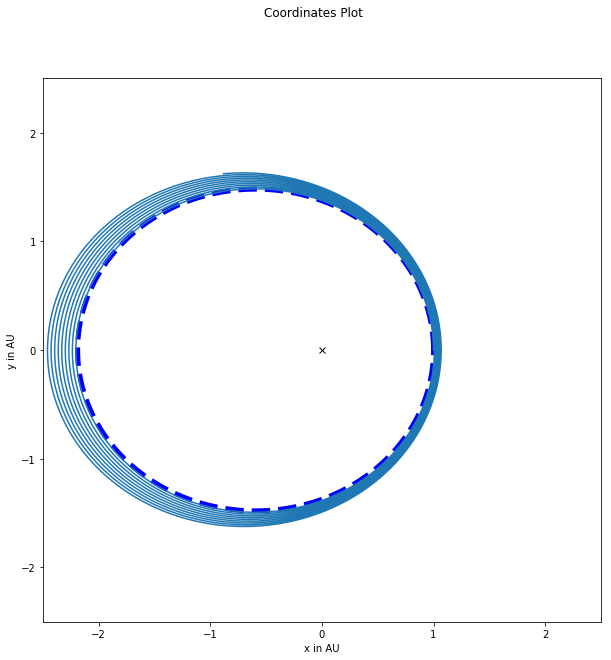

In [8]:
# now, generate the theta array
ntheta = 500 # number of points for theta
th_an = np.linspace(0, 360, ntheta)

# now, create r(theta)
r_an = (a*(1-ecc*ecc))/(1.0 + ecc*np.cos( th_an*np.pi/180.0 ))

# for plotting -> x/y coords for m2
x_an = r_an*np.cos( th_an*np.pi/180.0 )/AUinCM
y_an = r_an*np.sin( th_an*np.pi/180.0 )/AUinCM

# plot x/y coords
fig, ax = plt.subplots(1, figsize = (10, 10))
fig.suptitle('Coordinates Plot')

ax.plot(x_an, y_an, 'b--', linewidth=5)
ax.plot(0.0, 0.0, 'kx')
ax.set_xlabel('x in AU')
ax.set_ylabel('y in AU')

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

# plot Euler's solution
ax.plot(r[:,0]/AUinCM, r[:,1]/AUinCM)

plt.show()

In [25]:
# for efficiency
# ecc is unitless, Tplanet in years
def plot_orbits(eccPlanet, Tplanet, delta_t_frac = 0.0001, n_orbits=10):
    # years -> seconds
    Tplanet *= 365*24*60*60.
    
    # use T to find a
    a = ( Tplanet**2*G*mass_of_star/(4*np.pi**2))**(1./3.)
    # use a to find rp
    rp = a*(1-eccPlanet)
    # use rp and ecc to get vp
    vp = np.sqrt( G*mass_of_star*(1+eccPlanet)/rp )
    
    # do what we did before
    r_0 = np.array([rp, 0])
    v_0 = np.array([0, vp])

    delta_t = Tplanet*delta_t_frac

    #n_steps = int(np.round(Porb/delta_t))*n_orbits
    n_steps = int(np.round(1./delta_t_frac))*n_orbits

    ri = r_0
    vi = v_0

    r = []
    for i in range(n_steps):
        # use function to grab ag
        ag = calcAcc(mass_of_star, ri)
        ri1 = ri + vi*delta_t
        vi1 = vi + ag*delta_t

        # append to r vector
        r.append(ri1)

        # replace stuff
        ri = ri1
        vi = vi1

    # what does it look like?
    r = np.array(r)

    # now, create r(theta)
    r_an = (a*(1-ecc*ecc))/(1.0 + ecc*np.cos( th_an*np.pi/180.0 ))

    # for plotting -> x/y coords for m2
    x_an = r_an*np.cos( th_an*np.pi/180.0 )/AUinCM
    y_an = r_an*np.sin( th_an*np.pi/180.0 )/AUinCM

    # plot x/y coords
    fig, ax = plt.subplots(1, figsize = (10, 10))
    fig.suptitle('Coordinates Plot')

    ax.plot(x_an, y_an, 'b--', linewidth=5)
    ax.plot(0.0, 0.0, 'kx')
    ax.set_xlabel('x in AU')
    ax.set_ylabel('y in AU')

    ax.set_xlim(-2.5*rp/AUinCM, 2.5*rp/AUinCM)
    ax.set_ylim(-2.5*rp/AUinCM, 2.5*rp/AUinCM)

    # plot Euler's solution
    ax.plot(r[:,0]/AUinCM, r[:,1]/AUinCM)

    plt.show()

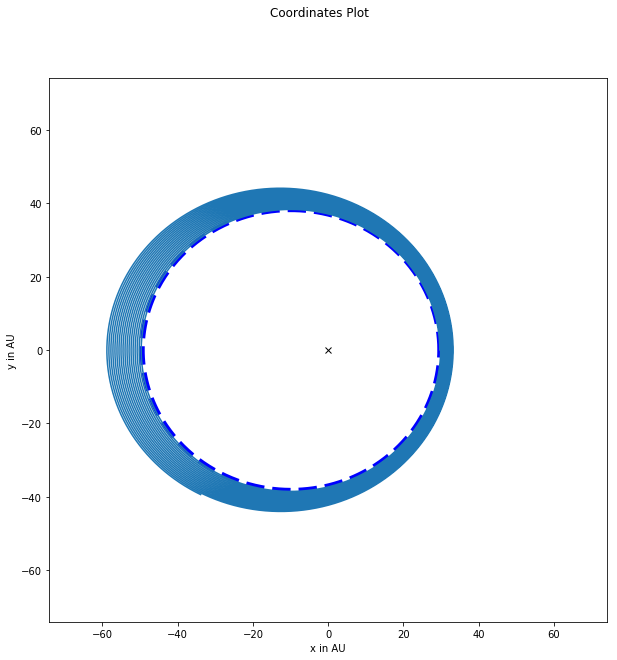

In [28]:
#for earth
ecc = 0.02
T = 1.0 # year

# pluto
ecc = 0.25
T = 248.0 # years

plot_orbits(ecc, T, delta_t_frac=0.0001, n_orbits=20)